<a href="https://colab.research.google.com/github/Murtuzaali-Rangwala/Data-Analysis-Project-Canada-s-Healthcare-Wait-Times-Crisis/blob/main/Wait_times_2018_to_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Healthcare Wait Times Analysis Project

---


This project aims to analyze healthcare wait times across Canadian provinces and territories, focusing on surgical procedures, diagnostic scans, and other critical medical services. The motivation stems from a personal experience where a 30-day wait to see a family doctor highlighted systemic delays in Canada’s healthcare system. Compared to more accessible healthcare in countries like India, this disparity raised concerns about efficiency and patient outcomes, especially for urgent or major treatments.

# DATASET


---


The dataset for this analysis primarily comes from the Canadian Institute for Health Information (CIHI), specifically their Wait Time Metadata repository ([link](https://www.cihi.ca/en/wait-time-metadata)). Here’s why this is a credible and comprehensive source for analyzing Canadian healthcare wait times:

### Data Source: Canadian Institute for Health Information (CIHI)

CIHI is Canada’s official national health data organization, funded by federal and provincial governments. It collects standardized wait time data from all provinces/territories, ensuring:

1. Reliability: Data is reported by hospitals/clinics under strict guidelines.
2. Comparability: Metrics (e.g., 50th/90th percentile waits) are calculated uniformly.
3. Coverage: Includes major procedures

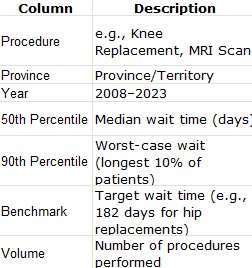



## What is Benchmark?
In Canadian healthcare, a "**Benchmark**" is the maximum medically acceptable wait time set by health authorities for a specific procedure. When a dataset refers to "Procedures with Benchmark," it means:

1. These procedures have official government targets for how long patients should wait.
Example:

*   Hip Replacement Benchmark = 182 days (6 months)
*   Cataract Surgery Benchmark = 112 days (~4 months)

2. They are prioritized because delays risk patient health (e.g., worsening pain, disability, or cancer progression).
3. Performance is tracked—hospitals report what % of patients receive care within the benchmark.

### Why Some Procedures Have Benchmarks?
Procedures WITH Benchmarks


1.   Hip/Knee Replacements
2.   Cataract Surgeries
3. Cancer Radiation Therapy
4. Cardiac Bypass Surgery

Procedures WITHOUT Benchmarks


1.   MRI Scans
2.   Family Doctor Appointments
3. Non-urgent specialist visits
4. Physiotherapy

### Reason
Benchmarks exist for procedures where delays directly harm health. Non-benchmarked waits (like MRIs) may still be tracked but lack formal targets.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
df = pd.read_csv('Wait_Time.csv', encoding='latin-1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17276 entries, 0 to 17275
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Reporting level      17276 non-null  object 
 1   Province/territory   17276 non-null  object 
 2   Region               5200 non-null   object 
 3   Indicator            17276 non-null  object 
 4   Metric               17276 non-null  object 
 5   Data year            17276 non-null  object 
 6   Unit of measurement  17276 non-null  object 
 7   Indicator result     14083 non-null  object 
 8   Unnamed: 8           0 non-null      float64
 9   Unnamed: 9           21 non-null     object 
 10  Unnamed: 10          0 non-null      float64
 11  Unnamed: 11          2 non-null      float64
 12  Unnamed: 12          0 non-null      float64
 13  Unnamed: 13          0 non-null      float64
 14  Unnamed: 14          0 non-null      float64
 15  Unnamed: 15          0 non-null     

In [ ]:
df.describe()

,Unnamed: 8,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
count,0.0,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,7.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,9.192388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,7.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,10.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
Reporting level,0
Province/territory,0
Region,12076
Indicator,0
Metric,0
Data year,0
Unit of measurement,0
Indicator result,3193
Unnamed: 8,17276
Unnamed: 9,17255


In [ ]:
df.head(3)

,Reporting level,Province/territory,Region,Indicator,Metric,Data year,Unit of measurement,Indicator result,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Provincial,Alberta,NaN,Bladder Cancer Surgery,50th Percentile,2008,Days,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Provincial,Alberta,NaN,Bladder Cancer Surgery,90th Percentile,2008,Days,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Provincial,Alberta,NaN,Bladder Cancer Surgery,Volume,2008,Number of cases,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Dropping bad data
df = df.drop(columns=['Unnamed: 8'])
df = df.drop(columns=['Unnamed: 9'])
df = df.drop(columns=['Unnamed: 10'])
df = df.drop(columns=['Unnamed: 11'])
df = df.drop(columns=['Unnamed: 12'])
df = df.drop(columns=['Unnamed: 13'])
df = df.drop(columns=['Unnamed: 14'])
df = df.drop(columns=['Unnamed: 15'])
df = df.drop(columns=['Unnamed: 16'])
df = df.drop(columns=['Unnamed: 17'])
df = df.drop(columns=['Unnamed: 18'])
df = df.drop(columns=['Unnamed: 19'])
df = df.drop(columns=['Unnamed: 20'])
df = df.drop(columns=['Unnamed: 21'])
df = df.drop(columns=['Unnamed: 22'])
df = df.drop(columns=['Unnamed: 23'])
df = df.drop(columns=['Unnamed: 24'])
df = df.drop(columns=['Unnamed: 25'])
df = df.drop(columns=['Unnamed: 26'])
df = df.drop(columns=['Unnamed: 27'])
df = df.drop(columns=['Unnamed: 28'])
df = df[df['Province/territory'] != 'Canada']

In [ ]:
df.head(2)

,Reporting level,Province/territory,Region,Indicator,Metric,Data year,Unit of measurement,Indicator result
0,Provincial,Alberta,NaN,Bladder Cancer Surgery,50th Percentile,2008,Days,NaN
1,Provincial,Alberta,NaN,Bladder Cancer Surgery,90th Percentile,2008,Days,NaN


In [ ]:
df.tail(2)

,Reporting level,Province/territory,Region,Indicator,Metric,Data year,Unit of measurement,Indicator result
17274,Provincial,Saskatchewan,NaN,CABG,50th Percentile,2023,Days,6
17275,Provincial,Saskatchewan,NaN,Radiation Therapy,Volume,2023,Number of cases,"1,292"


In [ ]:
df.describe()

,Reporting level,Province/territory,Region,Indicator,Metric,Data year,Unit of measurement,Indicator result
count,16184,16184,5200,16184,16184,16184,16184,13239
unique,2,10,65,15,7,24,4,2259
top,Provincial,Quebec,South Zone,Knee Replacement,Volume,2016,Days,20
freq,10984,2532,80,3560,4516,1000,8360,123


In [ ]:
df.isnull().sum()

,0
Reporting level,0
Province/territory,0
Region,10984
Indicator,0
Metric,0
Data year,0
Unit of measurement,0
Indicator result,2945


In [ ]:
# Rename columns for clarity
df.columns = ['Reporting_level', 'Province', 'Region', 'Indicator', 'Metric',
              'Data_year', 'Unit', 'Value']
df.head(3)

,Reporting_level,Province,Region,Indicator,Metric,Data_year,Unit,Value
0,Provincial,Alberta,NaN,Bladder Cancer Surgery,50th Percentile,2008,Days,NaN
1,Provincial,Alberta,NaN,Bladder Cancer Surgery,90th Percentile,2008,Days,NaN
2,Provincial,Alberta,NaN,Bladder Cancer Surgery,Volume,2008,Number of cases,NaN


Procedures with Benchmark
1.   Knee Replacement
2.   Hip Replacement
3.   Cataract surgery
4.   Hip Fracture Repair
5.   Radiation Therapy

In [ ]:
# Filter for relevant metrics
wait_time_metrics = ['50th Percentile', '90th Percentile']
df_wait = df[df['Metric'].isin(wait_time_metrics)]

# Filter for benchmark procedures
benchmark_procedures = ['Knee Replacement', 'Hip Replacement', 'Cataract surgery', 'Hip Fracture Repair', 'Radiation Therapy']
df_benchmark = df_wait[df_wait['Indicator'].isin(benchmark_procedures)]

In [ ]:
df_wait.head(2)

,Reporting_level,Province,Region,Indicator,Metric,Data_year,Unit,Value
0,Provincial,Alberta,NaN,Bladder Cancer Surgery,50th Percentile,2008,Days,NaN
1,Provincial,Alberta,NaN,Bladder Cancer Surgery,90th Percentile,2008,Days,NaN


In [ ]:
df_wait.tail(2)

,Reporting_level,Province,Region,Indicator,Metric,Data_year,Unit,Value
17273,Provincial,Nova Scotia,NaN,CABG,50th Percentile,2023,Days,7
17274,Provincial,Saskatchewan,NaN,CABG,50th Percentile,2023,Days,6


In [ ]:
df_benchmark.head(2)

,Reporting_level,Province,Region,Indicator,Metric,Data_year,Unit,Value
7,Provincial,Nova Scotia,NaN,Knee Replacement,90th Percentile,2008,Days,647
8,Provincial,Nova Scotia,NaN,Hip Replacement,90th Percentile,2008,Days,642


Wait Times by Province for Benchmark Procedures (2018-2023)

In [ ]:
# For 90th Percentile in year 2018
# 90th Percentile = 1 out of 10 patients waited this many days before receiving care

df_benchmark.loc[:, 'Year'] = pd.to_datetime(df_benchmark['Data_year'], format='%Y').dt.year

year_2018 = df_benchmark.loc[df_benchmark['Year'] == 2018].copy()

year_2018.loc[:, 'Value'] = pd.to_numeric(year_2018['Value'], errors='coerce')

# Create pivot table (unchanged)
pivot_wait = year_2018.pivot_table(index=['Province', 'Indicator'],
                                 columns='Metric',
                                 values='Value')

# Visualization code (unchanged)
for procedure in benchmark_procedures:
    if procedure in pivot_wait.index.get_level_values('Indicator'):
        proc_data = pivot_wait.xs(procedure, level='Indicator').sort_values('90th Percentile', ascending=False)

        fig = px.bar(proc_data,
                    x=proc_data.index,
                    y='90th Percentile',
                    title=f'{procedure} - Wait Times (Days) in 2018',
                    labels={'x': 'Province', 'y': 'Days'},
                    color='90th Percentile',
                    color_continuous_scale='reds')
        fig.update_layout(
            xaxis_tickangle=0,  # Tilt labels at 45 degrees
            xaxis_title='Province',  # Explicit x-axis title
            yaxis_title='Wait Times (Days)',

        )
        fig.update_traces(hovertemplate='Province: %{x}<br>Wait Time: %{y} days')

        fig.show()


    else:
        print(f"Procedure '{procedure}' not found in 2019 data.")

In [ ]:
# For 90th Percentile in year 2019
# 90th Percentile = 1 out of 10 patients waited this many days before receiving care

df_benchmark.loc[:, 'Year'] = pd.to_datetime(df_benchmark['Data_year'], format='%Y').dt.year

year_2019 = df_benchmark.loc[df_benchmark['Year'] == 2019].copy()

year_2019.loc[:, 'Value'] = pd.to_numeric(year_2019['Value'], errors='coerce')

# Create pivot table (unchanged)
pivot_wait = year_2019.pivot_table(index=['Province', 'Indicator'],
                                 columns='Metric',
                                 values='Value')

# Visualization code (unchanged)
for procedure in benchmark_procedures:
    if procedure in pivot_wait.index.get_level_values('Indicator'):
        proc_data = pivot_wait.xs(procedure, level='Indicator').sort_values('90th Percentile', ascending=False)

        fig = px.bar(proc_data,
                    x=proc_data.index,
                    y='90th Percentile',
                    title=f'{procedure} - Wait Times (Days) in 2019',
                    labels={'x': 'Province', 'y': 'Wait Times (Days)'},
                    color='90th Percentile',
                    color_continuous_scale='reds')
        fig.update_layout(
            xaxis_tickangle=0,  # Tilt labels at 45 degrees
            xaxis_title='Province',  # Explicit x-axis title
            yaxis_title='Wait Times (Days)',

        )
        fig.update_traces(hovertemplate='Province: %{x}<br>Wait Time: %{y} days')

        fig.show()
    else:
        print(f"Procedure '{procedure}' not found in 2019 data.")

In [ ]:
# For 90th Percentile in year 2020
# 90th Percentile = 1 out of 10 patients waited this many days before receiving care

# SAFELY convert years to datetime using .loc
df_benchmark.loc[:, 'Year'] = pd.to_datetime(df_benchmark['Data_year'], format='%Y').dt.year

# Get 2020 data with explicit copy to avoid warnings
year_2020 = df_benchmark.loc[df_benchmark['Year'] == 2020].copy()

# PROPERLY convert values to numeric using .loc
year_2020.loc[:, 'Value'] = pd.to_numeric(year_2020['Value'], errors='coerce')

# Create pivot table (unchanged as this creates new objects)
pivot_wait = year_2020.pivot_table(index=['Province', 'Indicator'],
                                 columns='Metric',
                                 values='Value')

# Visualization code (unchanged)
for procedure in benchmark_procedures:
    if procedure in pivot_wait.index.get_level_values('Indicator'):
        proc_data = pivot_wait.xs(procedure, level='Indicator').sort_values('90th Percentile', ascending=False)

        fig = px.bar(proc_data,
                    x=proc_data.index,
                    y='90th Percentile',
                    title=f'{procedure} - 90th Percentile Wait Times (Days) in 2020',
                    labels={'x': 'Province', 'y': 'Days'},
                    color='90th Percentile',
                    color_continuous_scale='reds')
        fig.update_layout(
            xaxis_tickangle=0,  # Tilt labels at 45 degrees
            xaxis_title='Province',  # Explicit x-axis title
            yaxis_title='Wait Times (Days)',

        )
        fig.update_traces(hovertemplate='Province: %{x}<br>Wait Time: %{y} days')

        fig.show()
    else:
        print(f"Procedure '{procedure}' not found in 2020 data.")

In [ ]:
# For 90th Percentile in year 2021
# 90th Percentile = 1 out of 10 patients waited this many days before receiving care

# SAFELY convert years to datetime using .loc
df_benchmark.loc[:, 'Year'] = pd.to_datetime(df_benchmark['Data_year'], format='%Y').dt.year

# Get 2021 data with explicit copy to avoid warnings
year_2021 = df_benchmark.loc[df_benchmark['Year'] == 2021].copy()

# PROPERLY convert values to numeric using .loc
year_2021.loc[:, 'Value'] = pd.to_numeric(year_2021['Value'], errors='coerce')

# Create pivot table
pivot_wait = year_2021.pivot_table(index=['Province', 'Indicator'],
                                 columns='Metric',
                                 values='Value')

# Visualization code with x-axis label rotation
for procedure in benchmark_procedures:
    if procedure in pivot_wait.index.get_level_values('Indicator'):
        proc_data = pivot_wait.xs(procedure, level='Indicator').sort_values('90th Percentile', ascending=False)

        fig = px.bar(proc_data,
                    x=proc_data.index,
                    y='90th Percentile',
                    title=f'{procedure} - 90th Percentile Wait Times (Days) in 2021',
                    labels={'x': 'Province', 'y': 'Days'},
                    color='90th Percentile',
                    color_continuous_scale='reds')

        fig.update_layout(
            xaxis_tickangle=0,  # Tilt labels at 45 degrees
            xaxis_title='Province',  # Explicit x-axis title
            yaxis_title='Wait Times (Days)',

        )
        fig.update_traces(hovertemplate='Province: %{x}<br>Wait Time: %{y} days')

        fig.show()
    else:
        print(f"Procedure '{procedure}' not found in 2021 data.")

In [ ]:
# For 90th Percentile in year 2022
# 90th Percentile = 1 out of 10 patients waited this many days before receiving care

# SAFELY convert years to datetime using .loc
df_benchmark.loc[:, 'Year'] = pd.to_datetime(df_benchmark['Data_year'], format='%Y').dt.year

# Get 2022 data with explicit copy to avoid warnings
year_2022 = df_benchmark.loc[df_benchmark['Year'] == 2022].copy()

# PROPERLY convert values to numeric using .loc
year_2022.loc[:, 'Value'] = pd.to_numeric(year_2022['Value'], errors='coerce')

# Create pivot table
pivot_wait = year_2022.pivot_table(index=['Province', 'Indicator'],
                                 columns='Metric',
                                 values='Value')

# Visualization code with optimized layout
for procedure in benchmark_procedures:
    if procedure in pivot_wait.index.get_level_values('Indicator'):
        proc_data = pivot_wait.xs(procedure, level='Indicator').sort_values('90th Percentile', ascending=False)

        fig = px.bar(proc_data,
                    x=proc_data.index,
                    y='90th Percentile',
                    title=f'{procedure} - 90th Percentile Wait Times (Days) in 2022',
                    labels={'x': 'Province', 'y': 'Days'},
                    color='90th Percentile',
                    color_continuous_scale='reds')

        fig.update_layout(
            xaxis_tickangle=0,  # Tilt labels at 45 degrees
            xaxis_title='Province',  # Explicit x-axis title
            yaxis_title='Wait Times (Days)',

        )
        fig.update_traces(hovertemplate='Province: %{x}<br>Wait Time: %{y} days')

        fig.show()
    else:
        print(f"Procedure '{procedure}' not found in 2022 data.")

In [ ]:
# For 90th Percentile in year 2023
# 90th Percentile = 1 out of 10 patient waited this many days before receiving care

# Convert years to datetime for better handling
df_benchmark.loc[:, 'Year'] = pd.to_datetime(df_benchmark['Data_year'], format='%Y').dt.year

# Get the latest year's data (assuming 2023 is the latest year)
latest_year = df_benchmark.loc[df_benchmark['Year'] == 2023].copy()

# Convert the 'Value' column to numeric, handling errors
latest_year.loc[:, 'Value'] = pd.to_numeric(latest_year['Value'], errors='coerce')

# Create the pivot table
pivot_wait = latest_year.pivot_table(index=['Province', 'Indicator'],
                                   columns='Metric',
                                   values='Value')

# Plot top provinces with longest 90th percentile wait times for each procedure
for procedure in benchmark_procedures:
    if procedure in pivot_wait.index.get_level_values('Indicator'):
        proc_data = pivot_wait.xs(procedure, level='Indicator').sort_values('90th Percentile', ascending=False)

        # Create bar chart with hover data and color gradient using Plotly
        fig = px.bar(proc_data,
                     x=proc_data.index,
                     y='90th Percentile',
                     title=f'{procedure} - 90th Percentile Wait Times (Days) in 2023',
                     labels={'x': 'Province', 'y': 'Days'},
                     color='90th Percentile',  # Color bars based on wait time
                     color_continuous_scale='reds'
                     )


        fig.update_traces(hovertemplate='Province: %{x}<br>Wait Time: %{y} days')

        fig.update_layout(  xaxis_tickangle=0,  # Tilt labels at 45 degrees
            xaxis_title='Province',  # Explicit x-axis title
            yaxis_title='Wait Times (Days)',)

        fig.show()
    else:
        print(f"Procedure '{procedure}' not found in data for the selected year.")

Procedures with Cancer Surgeries
1.   Breast Cancer Surgery
2.   Bladder Cancer Surgery
3.   Colorectal Cancer Surgery
4.   Lung Cancer Surgery
5.   Prostate Cancer Surgery

In [ ]:
# Filter for relevant metrics
wait_time_metrics = ['50th Percentile', '90th Percentile']
df_wait = df[df['Metric'].isin(wait_time_metrics)]

# Filter for Cancer Surgeries procedures
CS_procedures = ['Breast Cancer Surgery', 'Bladder Cancer Surgery', 'Colorectal Cancer Surgery', 'Lung Cancer Surgery', 'Prostate Cancer Surgery']
df_CS = df_wait[df_wait['Indicator'].isin(CS_procedures)]

# Convert years to datetime for better handling
df_CS['Year'] = pd.to_datetime(df_CS['Data_year'], format='%Y').dt.year

<ipython-input-52-34e64432be47>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# For 90th Percentile in year 2018
# 90th Percentile = 1 out of 10 patients waited this many days before receiving care

# Get 2018 data with explicit copy to avoid warnings
year_2018 = df_CS.loc[df_CS['Year'] == 2018].copy()

# Convert the 'Value' column to numeric, handling errors
year_2018.loc[:, 'Value'] = pd.to_numeric(year_2018['Value'], errors='coerce')

# Create the pivot table
pivot_wait = year_2018.pivot_table(index=['Province', 'Indicator'],
                                 columns='Metric',
                                 values='Value')

# Plot top provinces with longest 90th percentile wait times for each procedure
for procedure in CS_procedures:
    if procedure in pivot_wait.index.get_level_values('Indicator'):
        proc_data = pivot_wait.xs(procedure, level='Indicator').sort_values('90th Percentile', ascending=False)

        # Create bar chart with hover data and color gradient using Plotly
        fig = px.bar(proc_data,
                    x=proc_data.index,
                    y='90th Percentile',
                    title=f'{procedure} - 90th Percentile Wait Times (Days) in 2018',
                    labels={'x': 'Province', 'y': 'Days'},
                    color='90th Percentile',
                    color_continuous_scale='greys')

        # Customize layout with horizontal x-axis labels
        fig.update_layout(
            xaxis_tickangle=0,  # 0 degree tilt (completely horizontal)
            xaxis_title='Province',
            yaxis_title='Wait Time (Days)'
        )

        fig.update_traces(
            hovertemplate='Province: %{x}<br>Wait Time: %{y} days',
            marker_line_width=0  # Removes border lines from bars
        )

        fig.show()
    else:
        print(f"Procedure '{procedure}' not found in 2018 data.")

In [ ]:
# For 90th Percentile in year 2019
# 90th Percentile = 1 out of 10 patients waited this many days before receiving care

# Get 2019 data with explicit copy to avoid warnings
year_2019 = df_CS.loc[df_CS['Year'] == 2019].copy()

# Convert the 'Value' column to numeric, handling errors
year_2019.loc[:, 'Value'] = pd.to_numeric(year_2019['Value'], errors='coerce')

# Create the pivot table
pivot_wait = year_2019.pivot_table(index=['Province', 'Indicator'],
                                 columns='Metric',
                                 values='Value')

# Plot top provinces with longest 90th percentile wait times for each procedure
for procedure in CS_procedures:
    if procedure in pivot_wait.index.get_level_values('Indicator'):
        proc_data = pivot_wait.xs(procedure, level='Indicator').sort_values('90th Percentile', ascending=False)

        # Create bar chart with hover data and color gradient using Plotly
        fig = px.bar(proc_data,
                    x=proc_data.index,
                    y='90th Percentile',
                    title=f'{procedure} - 90th Percentile Wait Times (Days) in 2019',
                    labels={'x': 'Province', 'y': 'Days'},
                    color='90th Percentile',
                    color_continuous_scale='greys')

        # Customize layout with horizontal x-axis labels
        fig.update_layout(
            xaxis_tickangle=0,  # 0 degree tilt (completely horizontal)
            xaxis_title='Province',
            yaxis_title='Wait Time (Days)',

        )
        fig.update_traces(hovertemplate='Province: %{x}<br>Wait Time: %{y} days')



        fig.show()
    else:
        print(f"Procedure '{procedure}' not found in 2019 data.")

In [ ]:
# For 90th Percentile in year 2020
# 90th Percentile = 1 out of 10 patient waited this many days before receiving care

# Get the past year's data (2020)
year_2020 = df_CS.loc[df_CS['Year'] == 2020].copy()  # Fixed warning

# Convert the 'Value' column to numeric, handling errors
year_2020.loc[:, 'Value'] = pd.to_numeric(year_2020['Value'], errors='coerce')  # Fixed warning

# Create the pivot table
pivot_wait = year_2020.pivot_table(index=['Province', 'Indicator'],
                                 columns='Metric',
                                 values='Value')

# Plot top provinces with longest 90th percentile wait times for each procedure
for procedure in CS_procedures:
    if procedure in pivot_wait.index.get_level_values('Indicator'):
        proc_data = pivot_wait.xs(procedure, level='Indicator').sort_values('90th Percentile', ascending=False)

        # Create bar chart with hover data and color gradient using Plotly
        fig = px.bar(proc_data,
                     x=proc_data.index,
                     y='90th Percentile',
                     title=f'{procedure} - 90th Percentile Wait Times (Days) in 2020',
                     labels={'x': 'Province', 'y': 'Days'},
                     color='90th Percentile',
                     color_continuous_scale='greys'
                     )


        # Customize hover template and set horizontal labels
        fig.update_traces(hovertemplate='Province: %{x}<br>Wait Time: %{y} days',
            marker_line_width=0  # Removes border lines from bars
                          )
        fig.update_layout(xaxis_tickangle=0,  # 0 degree tilt (completely horizontal)
            xaxis_title='Province',
            yaxis_title='Wait Time (Days)')  # Horizontal labels

        fig.show()
    else:
        print(f"Procedure '{procedure}' not found in data for the selected year.")

In [ ]:
# For 90th Percentile in year 2020
# 90th Percentile = 1 out of 10 patient waited this many days before receiving care

# Get the past year's data (2020)
year_2021 = df_CS.loc[df_CS['Year'] == 2021].copy()  # Fixed warning

# Convert the 'Value' column to numeric, handling errors
year_2021.loc[:, 'Value'] = pd.to_numeric(year_2021['Value'], errors='coerce')  # Fixed warning

# Create the pivot table
pivot_wait = year_2021.pivot_table(index=['Province', 'Indicator'],
                                 columns='Metric',
                                 values='Value')

# Plot top provinces with longest 90th percentile wait times for each procedure
for procedure in CS_procedures:
    if procedure in pivot_wait.index.get_level_values('Indicator'):
        proc_data = pivot_wait.xs(procedure, level='Indicator').sort_values('90th Percentile', ascending=False)

        # Create bar chart with hover data and color gradient using Plotly
        fig = px.bar(proc_data,
                     x=proc_data.index,
                     y='90th Percentile',
                     title=f'{procedure} - 90th Percentile Wait Times (Days) in 2021',
                     labels={'x': 'Province', 'y': 'Days'},
                     color='90th Percentile',
                     color_continuous_scale='greys'
                     )


        # Customize hover template and set horizontal labels
        fig.update_traces(hovertemplate='Province: %{x}<br>Wait Time: %{y} days',
            marker_line_width=0  # Removes border lines from bars
                          )
        fig.update_layout(xaxis_tickangle=0,  # 0 degree tilt (completely horizontal)
            xaxis_title='Province',
            yaxis_title='Wait Time (Days)')  # Horizontal labels

        fig.show()
    else:
        print(f"Procedure '{procedure}' not found in data for the selected year.")

In [ ]:
# For 90th Percentile in year 2022
# 90th Percentile = 1 out of 10 patients waited this many days before receiving care

# Get 2022 data with proper indexing to avoid warnings
year_2022 = df_CS.loc[df_CS['Year'] == 2022].copy()

# Convert the 'Value' column to numeric safely
year_2022.loc[:, 'Value'] = pd.to_numeric(year_2022['Value'], errors='coerce')

# Create the pivot table
pivot_wait = year_2022.pivot_table(index=['Province', 'Indicator'],
                                 columns='Metric',
                                 values='Value')

# Plot top provinces with longest 90th percentile wait times
for procedure in CS_procedures:
    if procedure in pivot_wait.index.get_level_values('Indicator'):
        proc_data = pivot_wait.xs(procedure, level='Indicator').sort_values('90th Percentile', ascending=False)

        fig = px.bar(proc_data,
                    x=proc_data.index,
                    y='90th Percentile',
                    title=f'{procedure} - 90th Percentile Wait Times (Days) in 2022',
                    labels={'x': 'Province', 'y': 'Days'},
                    color='90th Percentile',
                    color_continuous_scale='greys')

        # Set horizontal labels and clean formatting
        fig.update_layout(
            xaxis_tickangle=0,  # Completely horizontal labels
            xaxis_title='Province',
            yaxis_title='Wait Time (Days)',

        )



        fig.show()
    else:
        print(f"Procedure '{procedure}' not found in 2022 data.")

In [ ]:
# For 90th Percentile in year 2023
# 90th Percentile = 1 out of 10 patients waited this many days before receiving care

# Get 2023 data with proper indexing to avoid warnings
year_2023 = df_CS.loc[df_CS['Year'] == 2023].copy()

# Convert the 'Value' column to numeric safely
year_2023.loc[:, 'Value'] = pd.to_numeric(year_2023['Value'], errors='coerce')

# Create the pivot table
pivot_wait = year_2023.pivot_table(index=['Province', 'Indicator'],
                                 columns='Metric',
                                 values='Value')

# Plot top provinces with longest 90th percentile wait times
for procedure in CS_procedures:
    if procedure in pivot_wait.index.get_level_values('Indicator'):
        proc_data = pivot_wait.xs(procedure, level='Indicator').sort_values('90th Percentile', ascending=False)

        fig = px.bar(proc_data,
                    x=proc_data.index,
                    y='90th Percentile',
                    title=f'{procedure} - 90th Percentile Wait Times (Days) in 2023',
                    labels={'x': 'Province', 'y': 'Days'},
                    color='90th Percentile',
                    color_continuous_scale='greys')

        # Set horizontal labels and clean formatting
        fig.update_layout(
            xaxis_tickangle=0,  # Completely horizontal labels
            xaxis_title='Province',
            yaxis_title='Wait Time (Days)',

        )


        fig.show()
    else:
        print(f"Procedure '{procedure}' not found in 2023 data.")

Procedures with Imaging Procedures
1.   MRI Scan
2.   CT Scan

In [ ]:
# Filter for relevant metrics
wait_time_metrics = ['50th Percentile', '90th Percentile']
df_wait = df[df['Metric'].isin(wait_time_metrics)]

# Filter for Cancer Surgeries procedures
I_procedures = ['MRI Scan', 'CT Scan']
df_I = df_wait[df_wait['Indicator'].isin(I_procedures)]

# Convert years to datetime for better handling
df_I['Year'] = pd.to_datetime(df_I['Data_year'], format='%Y').dt.year

<ipython-input-59-12777f968b20>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# For 90th Percentile in year 2018
# 90th Percentile = 1 out of 10 patients waited this many days before receiving care

# Get 2018 data with proper indexing to avoid warnings
year_2018 = df_I.loc[df_I['Year'] == 2018].copy()

# Convert the 'Value' column to numeric safely
year_2018.loc[:, 'Value'] = pd.to_numeric(year_2018['Value'], errors='coerce')

# Create the pivot table
pivot_wait = year_2018.pivot_table(index=['Province', 'Indicator'],
                                 columns='Metric',
                                 values='Value')

# Plot top provinces with longest 90th percentile wait times
for procedure in I_procedures:
    if procedure in pivot_wait.index.get_level_values('Indicator'):
        proc_data = pivot_wait.xs(procedure, level='Indicator').sort_values('90th Percentile', ascending=False)

        fig = px.bar(proc_data,
                    x=proc_data.index,
                    y='90th Percentile',
                    title=f'{procedure} - 90th Percentile Wait Times (Days) in 2018',
                    labels={'x': 'Province', 'y': 'Days'},
                    color='90th Percentile',
                    color_continuous_scale='blues')

        # Set horizontal labels and clean formatting
        fig.update_layout(
            xaxis_tickangle=0,  # Completely horizontal labels
            xaxis_title='Province',
            yaxis_title='Wait Time (Days)',

        )



        fig.show()
    else:
        print(f"Procedure '{procedure}' not found in 2018 data.")

In [ ]:
# For 90th Percentile in year 2019
# 90th Percentile = 1 out of 10 patients waited this many days before receiving care

# Get 2019 data with proper indexing to avoid warnings
year_2019 = df_I.loc[df_I['Year'] == 2019].copy()

# Convert the 'Value' column to numeric safely
year_2019.loc[:, 'Value'] = pd.to_numeric(year_2019['Value'], errors='coerce')

# Create the pivot table
pivot_wait = year_2019.pivot_table(index=['Province', 'Indicator'],
                                 columns='Metric',
                                 values='Value')

# Plot top provinces with longest 90th percentile wait times
for procedure in I_procedures:
    if procedure in pivot_wait.index.get_level_values('Indicator'):
        proc_data = pivot_wait.xs(procedure, level='Indicator').sort_values('90th Percentile', ascending=False)

        fig = px.bar(proc_data,
                    x=proc_data.index,
                    y='90th Percentile',
                    title=f'{procedure} - 90th Percentile Wait Times (Days) in 2019',
                    labels={'x': 'Province', 'y': 'Days'},
                    color='90th Percentile',
                    color_continuous_scale='blues')

        # Set horizontal labels and clean formatting
        fig.update_layout(
            xaxis_tickangle=0,  # Completely horizontal labels
            xaxis_title='Province',
            yaxis_title='Wait Time (Days)',

        )


        fig.show()
    else:
        print(f"Procedure '{procedure}' not found in 2019 data.")

In [ ]:
# For 90th Percentile in year 2020
# 90th Percentile = 1 out of 10 patients waited this many days before receiving care

# Get 2020 data with proper indexing to avoid warnings
year_2020 = df_I.loc[df_I['Year'] == 2020].copy()

# Convert the 'Value' column to numeric safely
year_2020.loc[:, 'Value'] = pd.to_numeric(year_2020['Value'], errors='coerce')

# Create the pivot table
pivot_wait = year_2020.pivot_table(index=['Province', 'Indicator'],
                                 columns='Metric',
                                 values='Value')

# Plot top provinces with longest 90th percentile wait times
for procedure in I_procedures:
    if procedure in pivot_wait.index.get_level_values('Indicator'):
        proc_data = pivot_wait.xs(procedure, level='Indicator').sort_values('90th Percentile', ascending=False)

        fig = px.bar(proc_data,
                    x=proc_data.index,
                    y='90th Percentile',
                    title=f'{procedure} - 90th Percentile Wait Times (Days) in 2020',
                    labels={'x': 'Province', 'y': 'Days'},
                    color='90th Percentile',
                    color_continuous_scale='blues')

        # Set horizontal labels and clean formatting
        fig.update_layout(
            xaxis_tickangle=0,  # Completely horizontal labels
            xaxis_title='Province',
            yaxis_title='Wait Time (Days)',
            )


        fig.show()
    else:
        print(f"Procedure '{procedure}' not found in 2020 data.")

In [ ]:
# For 90th Percentile in year 2021
# 90th Percentile = 1 out of 10 patients waited this many days before receiving care

# Get 2021 data with proper indexing to avoid warnings
year_2021 = df_I.loc[df_I['Year'] == 2021].copy()

# Convert the 'Value' column to numeric safely
year_2021.loc[:, 'Value'] = pd.to_numeric(year_2021['Value'], errors='coerce')

# Create the pivot table
pivot_wait = year_2021.pivot_table(index=['Province', 'Indicator'],
                                 columns='Metric',
                                 values='Value')

# Plot top provinces with longest 90th percentile wait times
for procedure in I_procedures:
    if procedure in pivot_wait.index.get_level_values('Indicator'):
        proc_data = pivot_wait.xs(procedure, level='Indicator').sort_values('90th Percentile', ascending=False)

        fig = px.bar(proc_data,
                    x=proc_data.index,
                    y='90th Percentile',
                    title=f'{procedure} - 90th Percentile Wait Times (Days) in 2021',
                    labels={'x': 'Province', 'y': 'Days'},
                    color='90th Percentile',
                    color_continuous_scale='blues')

        # Set horizontal labels and clean formatting
        fig.update_layout(
            xaxis_tickangle=0,  # Completely horizontal labels
            xaxis_title='Province',
            yaxis_title='Wait Time (Days)',

        )


        fig.show()
    else:
        print(f"Procedure '{procedure}' not found in 2021 data.")

In [ ]:
# For 90th Percentile in year 2022
# 90th Percentile = 1 out of 10 patients waited this many days before receiving care

# Get 2022 data with proper indexing to avoid warnings
year_2022 = df_I.loc[df_I['Year'] == 2022].copy()

# Convert the 'Value' column to numeric safely
year_2022.loc[:, 'Value'] = pd.to_numeric(year_2022['Value'], errors='coerce')

# Create the pivot table
pivot_wait = year_2022.pivot_table(index=['Province', 'Indicator'],
                                 columns='Metric',
                                 values='Value')

# Plot top provinces with longest 90th percentile wait times
for procedure in I_procedures:
    if procedure in pivot_wait.index.get_level_values('Indicator'):
        proc_data = pivot_wait.xs(procedure, level='Indicator').sort_values('90th Percentile', ascending=False)

        fig = px.bar(proc_data,
                    x=proc_data.index,
                    y='90th Percentile',
                    title=f'{procedure} - 90th Percentile Wait Times (Days) in 2022',
                    labels={'x': 'Province', 'y': 'Days'},
                    color='90th Percentile',
                    color_continuous_scale='blues')

        # Set horizontal labels and clean formatting
        fig.update_layout(
            xaxis_tickangle=0,  # Completely horizontal labels
            xaxis_title='Province',
            yaxis_title='Wait Time (Days)',

        )



        fig.show()
    else:
        print(f"Procedure '{procedure}' not found in 2022 data.")

In [ ]:
# For 90th Percentile in year 2023
# 90th Percentile = 1 out of 10 patients waited this many days before receiving care

# Get 2023 data with proper indexing to avoid warnings
year_2023 = df_I.loc[df_I['Year'] == 2023].copy()

# Convert the 'Value' column to numeric safely
year_2023.loc[:, 'Value'] = pd.to_numeric(year_2023['Value'], errors='coerce')

# Create the pivot table
pivot_wait = year_2023.pivot_table(index=['Province', 'Indicator'],
                                 columns='Metric',
                                 values='Value')

# Plot top provinces with longest 90th percentile wait times
for procedure in I_procedures:
    if procedure in pivot_wait.index.get_level_values('Indicator'):
        proc_data = pivot_wait.xs(procedure, level='Indicator').sort_values('90th Percentile', ascending=False)

        fig = px.bar(proc_data,
                    x=proc_data.index,
                    y='90th Percentile',
                    title=f'{procedure} - 90th Percentile Wait Times (Days) in 2023',
                    labels={'x': 'Province', 'y': 'Days'},
                    color='90th Percentile',
                    color_continuous_scale='blues')

        # Set horizontal labels and clean formatting
        fig.update_layout(
            xaxis_tickangle=0,  # Completely horizontal labels
            xaxis_title='Province',
            yaxis_title='Wait Time (Days)',

        )

        fig.show()
    else:
        print(f"Procedure '{procedure}' not found in 2023 data.")

Wait Time Trend over Time

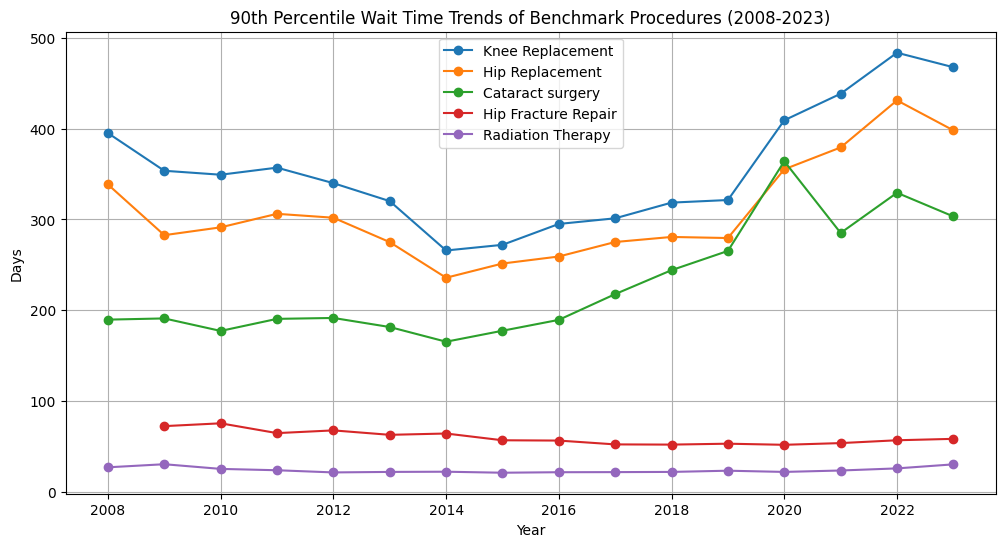

In [ ]:
#Converting Value into Numeric data
df_benchmark['Value'] = pd.to_numeric(df_benchmark['Value'], errors='coerce')

# Calculate average wait times by year and procedure
trends = df_benchmark.groupby(['Year', 'Indicator', 'Metric'])['Value'].mean().unstack()

# Plot trends
plt.figure(figsize=(12, 6))
for procedure in benchmark_procedures:
    proc_trend = trends.xs(procedure, level='Indicator')
    plt.plot(proc_trend.index, proc_trend['90th Percentile'], label=procedure, marker='o')

plt.title('90th Percentile Wait Time Trends of Benchmark Procedures (2008-2023)')
plt.xlabel('Year')
plt.ylabel('Days')
plt.legend()
plt.grid(True)
plt.show()

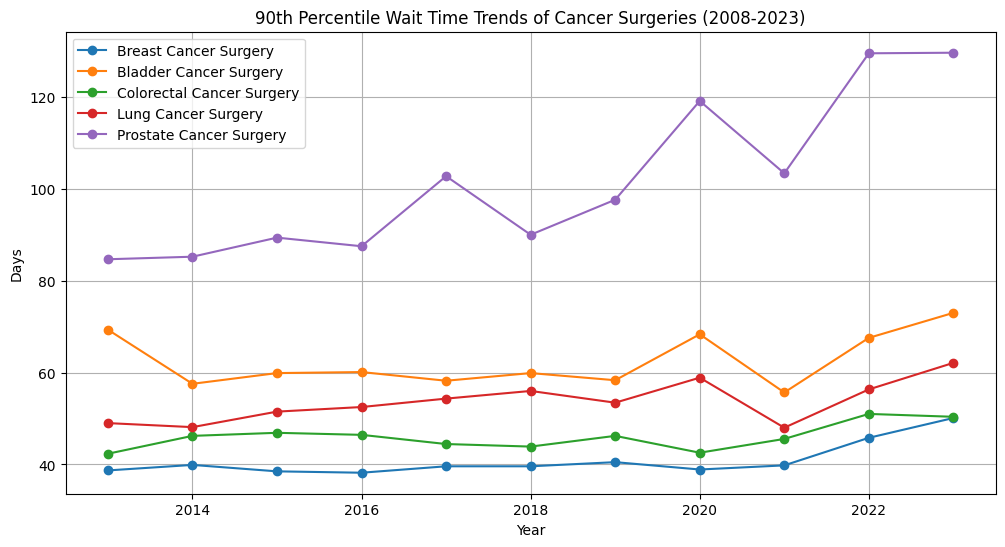

In [ ]:
#Converting Value into Numeric data
df_CS['Value'] = pd.to_numeric(df_CS['Value'], errors='coerce')

# Calculate average wait times by year and procedure
trends = df_CS.groupby(['Year', 'Indicator', 'Metric'])['Value'].mean().unstack()

# Plot trends
plt.figure(figsize=(12, 6))
for procedure in CS_procedures:
    proc_trend = trends.xs(procedure, level='Indicator')
    plt.plot(proc_trend.index, proc_trend['90th Percentile'], label=procedure, marker='o')

plt.title('90th Percentile Wait Time Trends of Cancer Surgeries (2008-2023)')
plt.xlabel('Year')
plt.ylabel('Days')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-68-05998809a3c2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



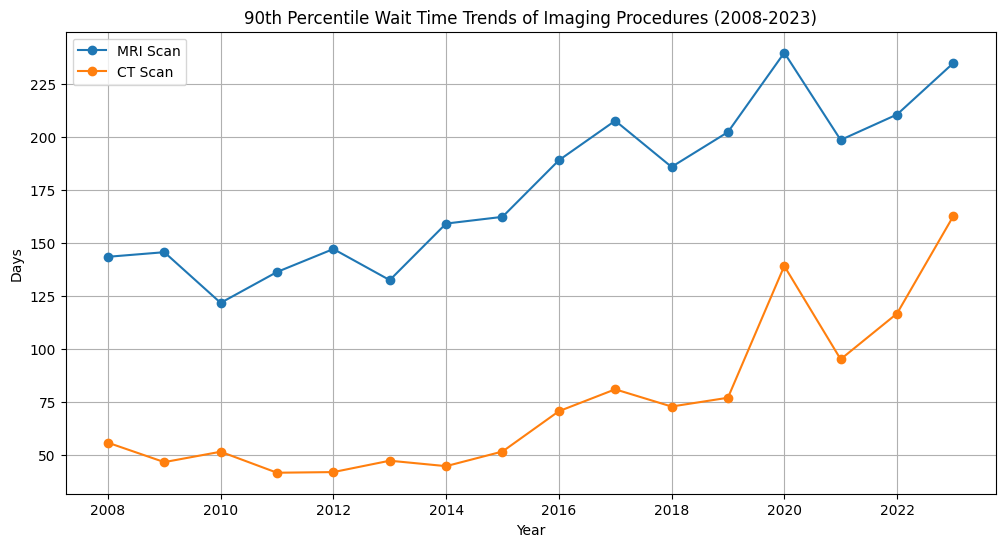

In [ ]:
#Converting Value into Numeric data
df_I['Value'] = pd.to_numeric(df_I['Value'], errors='coerce')

# Calculate average wait times by year and procedure
trends = df_I.groupby(['Year', 'Indicator', 'Metric'])['Value'].mean().unstack()

# Plot trends
plt.figure(figsize=(12, 6))
for procedure in I_procedures:
    proc_trend = trends.xs(procedure, level='Indicator')
    plt.plot(proc_trend.index, proc_trend['90th Percentile'], label=procedure, marker='o')

plt.title('90th Percentile Wait Time Trends of Imaging Procedures (2008-2023)')
plt.xlabel('Year')
plt.ylabel('Days')
plt.legend()
plt.grid(True)
plt.show()

% Meeting Benchmark Compliance Analysis

<ipython-input-69-cf390350909f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



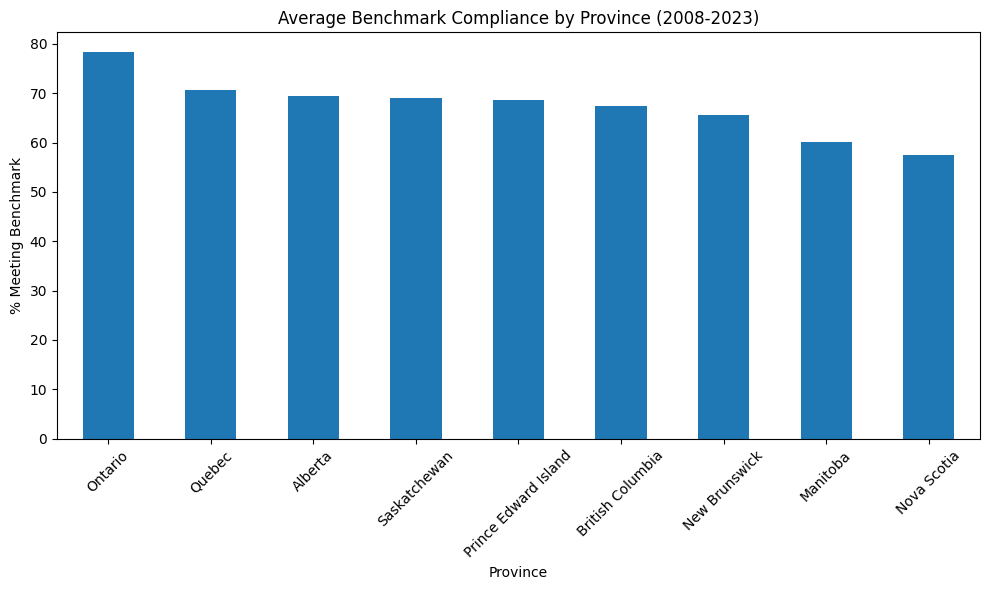

In [ ]:
# Filter for % Meeting Benchmark compliance data
df_Meeting_benchmark = df[(df['Metric'] == '% Meeting Benchmark')]

df_Meeting_benchmark['Value'] = pd.to_numeric(df_Meeting_benchmark['Value'], errors='coerce')

# Get average compliance by province, excluding 'Canada' from the start
benchmark_compliance = df_Meeting_benchmark[df_Meeting_benchmark['Province'] != 'Canada'].groupby('Province')['Value'].mean().sort_values(ascending=False)

# Create a new Series without 'Canada' for plotting
benchmark_compliance_plot = benchmark_compliance[benchmark_compliance.index != 'Canada']
# Get the list of provinces in the benchmark_compliance_plot Series
provinces = benchmark_compliance_plot.index.tolist()

# Select the provinces and eliminating Canada
provinces_to_plot = provinces[:1] + provinces[2:]

# Create a new Series with only the selected provinces
benchmark_compliance_plot_filtered = benchmark_compliance_plot[provinces_to_plot]

# Plot benchmark compliance, using the filtered Series
plt.figure(figsize=(10, 6))
benchmark_compliance_plot_filtered.plot(kind='bar')
plt.title('Average Benchmark Compliance by Province (2008-2023)')
plt.ylabel('% Meeting Benchmark')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Heat Map

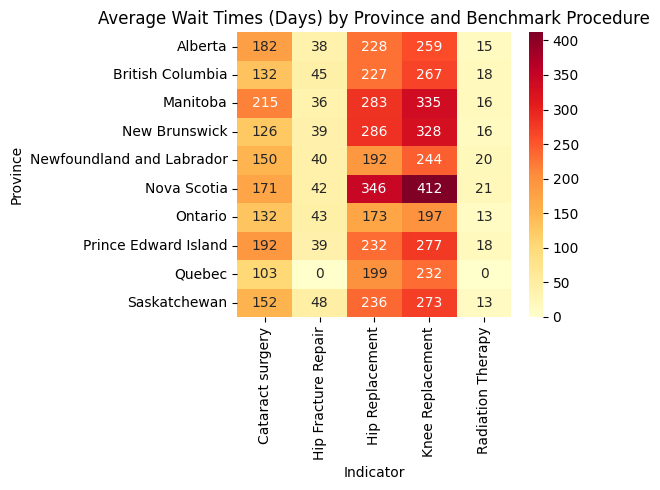

In [ ]:
# Create a heatmap of wait times by province and procedure
# 1. Convert 'Value' to numeric before pivoting, handling errors:
df_benchmark['Value'] = pd.to_numeric(df_benchmark['Value'], errors='coerce')

# 2. Create the pivot table:
heatmap_data = df_benchmark.pivot_table(
    index='Province',
    columns='Indicator',
    values='Value',
    aggfunc='mean',
    fill_value=0  # Replace NaN with 0 after conversion
)

# 3. Create the heatmap:
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Average Wait Times (Days) by Province and Benchmark Procedure')
plt.tight_layout()
plt.show()

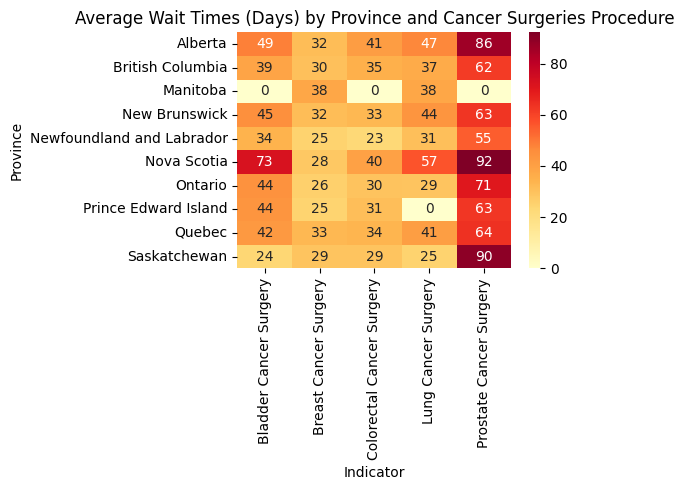

In [ ]:
# Create a heatmap of wait times by province and procedure
# 1. Convert 'Value' to numeric before pivoting, handling errors:
df_CS['Value'] = pd.to_numeric(df_CS['Value'], errors='coerce')

# 2. Create the pivot table:
heatmap_data = df_CS.pivot_table(
    index='Province',
    columns='Indicator',
    values='Value',
    aggfunc='mean',
    fill_value=0  # Replace NaN with 0 after conversion
)

# 3. Create the heatmap:
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Average Wait Times (Days) by Province and Cancer Surgeries Procedure')
plt.tight_layout()
plt.show()

<ipython-input-72-11822b448a90>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



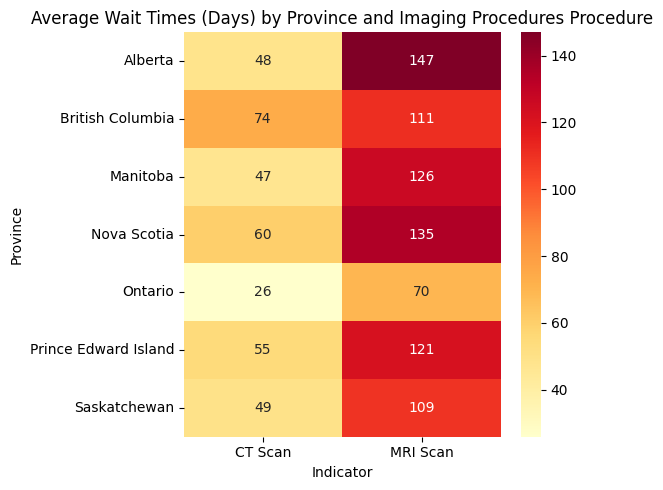

In [ ]:
# Create a heatmap of wait times by province and procedure
# 1. Convert 'Value' to numeric before pivoting, handling errors:
df_I['Value'] = pd.to_numeric(df_I['Value'], errors='coerce')

# 2. Create the pivot table:
heatmap_data = df_I.pivot_table(
    index='Province',
    columns='Indicator',
    values='Value',
    aggfunc='mean',
    fill_value=0  # Replace NaN with 0 after conversion
)

# 3. Create the heatmap:
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Average Wait Times (Days) by Province and Imaging Procedures Procedure')
plt.tight_layout()
plt.show()

# Key Insights:

### 1.Worst Wait Times (Longest Delays)

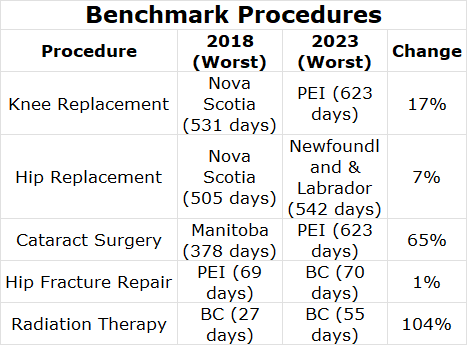


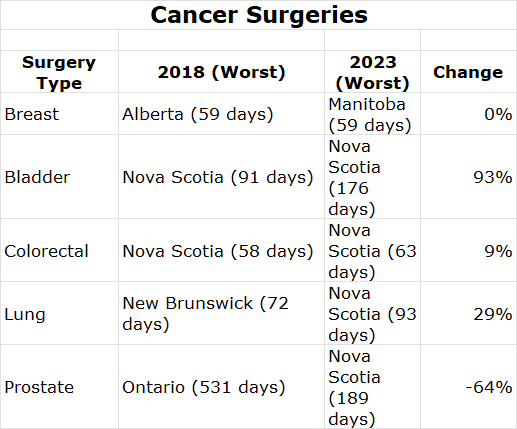

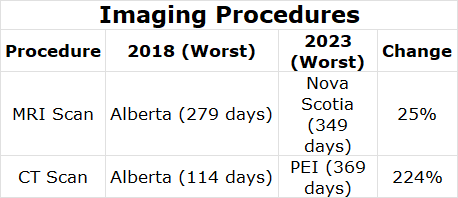

### 2. Best Performing Provinces (2023)
Benchmark Procedures
1. Hip Replacement: Ontario (270 days)
2. Knee Replacement: Ontario (296 days)
3. Cataract Surgery: BC (153 days)
4. Hip Fracture Repair: Newfoundland & Labrador (48 days)
5. Radiation Therapy: Ontario (18 days)

Cancer Surgeries
1. Breast: Ontario (42 days)
2. Bladder: Saskatchewan (35 days)
3. Colorectal: Newfoundland & Labrador (36 days)
4. Lung: Newfoundland & Labrador (36 days)
5. Prostate: Quebec (95 days)

Imaging Procedures
1. MRI Scan: Ontario (153 days)
2. CT Scan: Saskatchewan (92 days)

###3. Key Trends (2018 → 2023)
Benchmark Procedures

↑ Increasing Delays:
1. Knee Replacement
2. Hip Replacement
3. Radiation Therapy

↓ Decreasing/Slight Improvement:
1. Cataract Surgery
2. Hip Fracture Repair

Cancer Surgeries

↑ Increasing Delays:
1. Breast, Bladder, Colorectal, Lung
2. Drastic Increase:
3. Prostate (though improved from 2018’s worst)

Imaging Procedures

↑ Strong Upward Trend:
MRI & CT Scans (PEI’s CT wait tripled)

In conclusion, healthcare wait times for key procedures like joint replacements, cancer surgeries, and diagnostic imaging have significantly worsened between 2018-2023 in most Canadian provinces, with particularly severe delays in Nova Scotia and PEI. While a few exceptions like prostate surgeries show improvement, the overall trend points to growing systemic pressures. Ontario and Saskatchewan emerge as top performers, suggesting their approaches could provide solutions for struggling regions. These findings highlight an urgent need for targeted interventions, resource allocation reforms, and inter-provincial collaboration to address worsening wait times that directly impact patient care nationwide.

For any constructive feedback, please feel free to reach out via email at:
murtuzaalirangwala@gmail.com

Alternatively, you can connect with me on LinkedIn:
[Murtuzaali Rangwala](https://www.linkedin.com/in/murtuzaalirangwala4958)